In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [15]:
(X_dev, y_dev), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

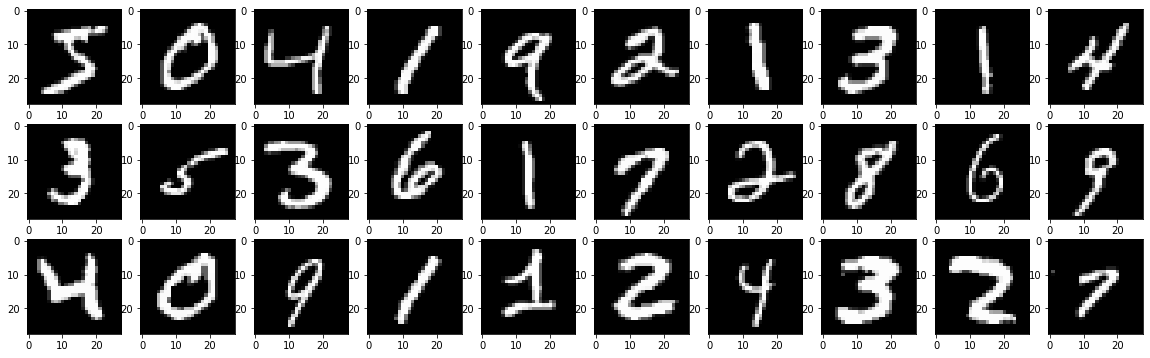

In [16]:
plt.figure(figsize=(20,6))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(X_dev[i], cmap="gray")

In [17]:
y_dev.shape

(60000,)

In [18]:
X_dev.shape

(60000, 28, 28)

In [19]:
X_dev = X_dev.reshape(X_dev.shape[0],X_dev.shape[1]*X_dev.shape[2])

In [20]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev, test_size=0.2)

In [22]:
y_train.shape

(48000,)

In [23]:
X_train.shape

(48000, 784)

In [24]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features,))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    flatten = tf.keras.layers.Flatten()(skjult_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='sigmoid')(flatten)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [26]:
y_train.shape

(48000,)

In [27]:
y_train

array([9, 4, 4, ..., 8, 8, 7], dtype=uint8)

In [28]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [29]:
y_train.shape

(48000, 10)

In [30]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [32]:
X_train.shape[1]

784

In [31]:
model = dnn(X_train.shape[1],y_train.shape[1])

In [33]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1568)                │       1,230,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          15,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,246,570 (4.76 MB)

 Trainable params: 1,246,570 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [35]:
y_val.shape

(12000, 10)

In [36]:
history = model.fit(x=X_train,y=y_train, epochs=15, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - auc: 0.7841 - categorical_accuracy: 0.3506 - loss: 12.7165 - val_auc: 0.8426 - val_categorical_accuracy: 0.6174 - val_loss: 0.6458
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - auc: 0.8422 - categorical_accuracy: 0.6066 - loss: 0.4156 - val_auc: 0.8590 - val_categorical_accuracy: 0.6948 - val_loss: 0.4318
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - auc: 0.8546 - categorical_accuracy: 0.6814 - loss: 0.2683 - val_auc: 0.8473 - val_categorical_accuracy: 0.6085 - val_loss: 0.6279
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - auc: 0.8479 - categorical_accuracy: 0.6025 - loss: 0.3494 - val_auc: 0.8588 - val_categorical_accuracy: 0.6202 - val_loss: 0.5631
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - auc: 0.8569 - categorical_accuracy: 0.6078 - loss: 0.3731 - val_auc: 0.8631 - val_categorical_accuracy: 0.6541 - val_loss: 0.4563
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - auc: 0.8637 - cate

In [79]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - auc_3: 0.8968 - categorical_accuracy: 0.6592 - loss: 0.7199


[0.5946491360664368, 0.6528000235557556, 0.8965107798576355]

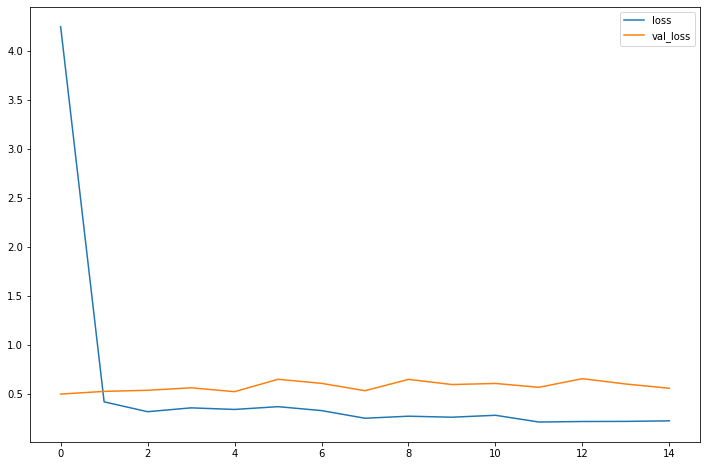

In [80]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

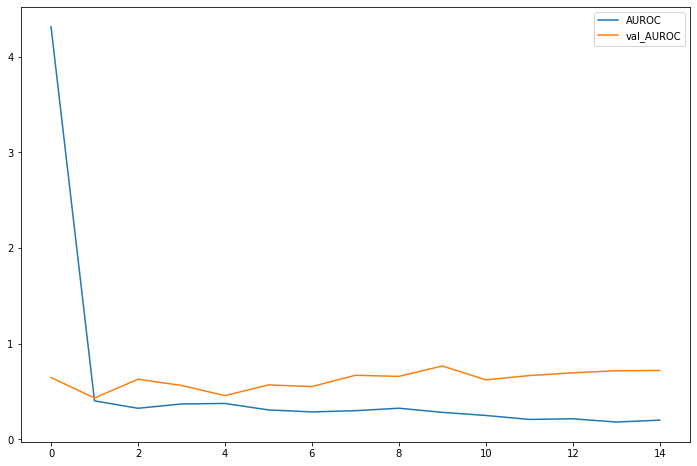

In [37]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()